CONVOLUCION

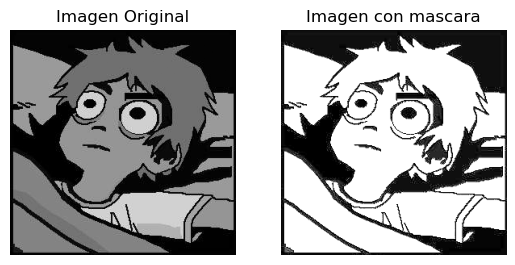

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread('img.jpg',0)
mascara=np.array([[0,-1,0,],
                  [1,5,-1,],
                  [0,1,0,]])
img_final=cv2.filter2D(img,-1,mascara)
plt.subplot(121)
plt.title('Imagen Original')
plt.axis('off')
plt.imshow(img,cmap='gray')

plt.subplot(122)
plt.title('Imagen con mascara')
plt.axis('off')
plt.imshow(img_final,cmap='gray')

plt.show()

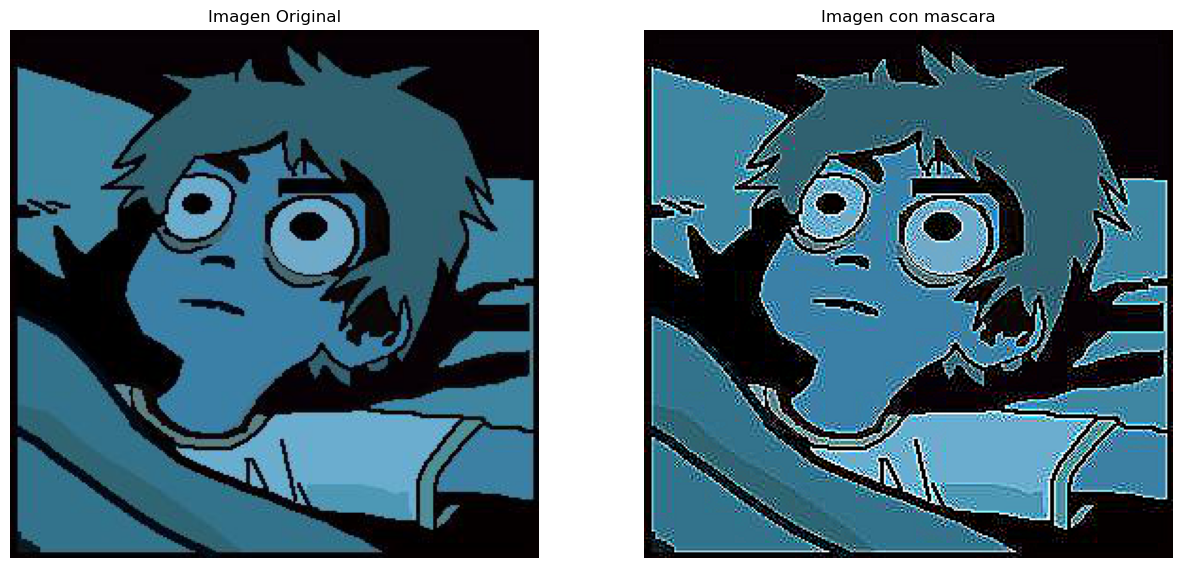

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread('img.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
mascara=np.array([[0,-1,0,],
                  [-1,5,-1,],
                  [0,-1,0,]])
img_final=cv2.filter2D(img,-1,mascara)
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.title('Imagen Original')
plt.axis('off')
plt.imshow(img,cmap='gray')

plt.subplot(122)
plt.title('Imagen con mascara')
plt.axis('off')
plt.imshow(img_final,cmap='gray')

plt.show()

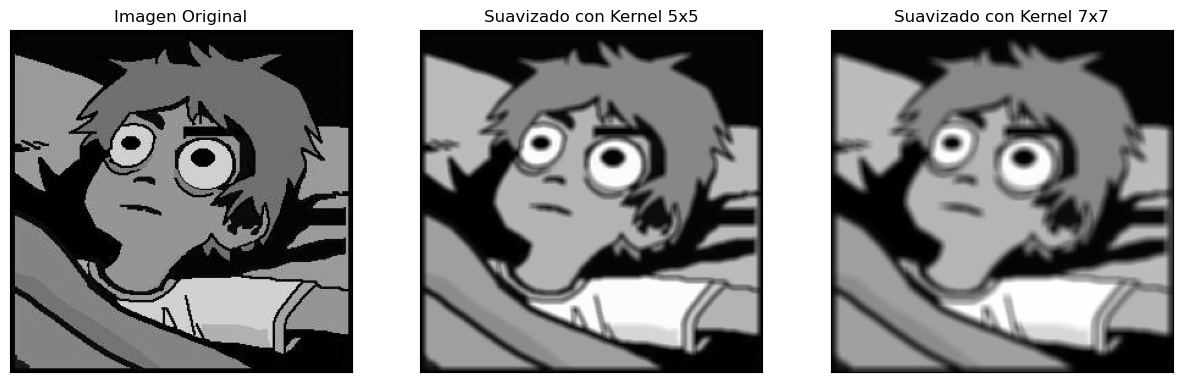

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lee la imagen en escala de grises (0)
img=cv2.imread('img.jpg',0)

# --- Suavizado con kernel de 5x5 ---
kernel5x5 = np.ones((5, 5), np.float32) / 25  # Suavizado
suavizado = cv2.filter2D(img, -1, kernel5x5)  # Imagen suavizada

# --- Suavizado con kernel de 7x7 ---
kernel7x7 = np.ones((7, 7), np.float32) / 49
suavizado2 = cv2.filter2D(img, -1, kernel7x7)

# --- Visualización de las imágenes ---
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(suavizado, cmap='gray')
plt.title('Suavizado con Kernel 5x5')
plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.imshow(suavizado2, cmap='gray')
plt.title('Suavizado con Kernel 7x7')
plt.xticks([]), plt.yticks([])

plt.show()



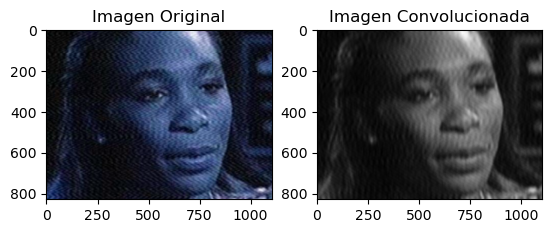

In [20]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

def convolucionMediaHorizontal(imagen,tamkernel):
    kernel=np.ones((tamkernel,1),np.float32)/(tamkernel)
    imagen_convolucionada=cv2.filter2D(imagen,-1,kernel)  
    return imagen_convolucionada


imagen=cv2.imread('imgD.jpg')  
gris=cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
imagen_convolucionada=convolucionMediaHorizontal(gris,25)   

plt.subplot(1,2,1)
plt.imshow(imagen,cmap='gray')
plt.title('Imagen Original')

plt.subplot(1,2,2)
plt.imshow(imagen_convolucionada,cmap='gray')
plt.title('Imagen Convolucionada')
plt.show()

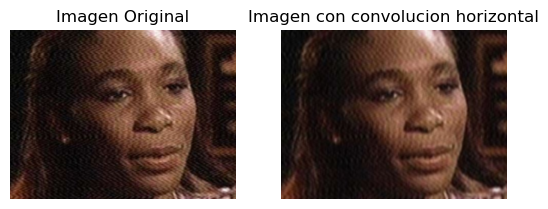

In [16]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

def convolucionMediaHorizontal(imagen,tamkernel):
    kernel=np.ones((tamkernel,1),np.float32)/(tamkernel)
    imagen_convolucionada=cv2.filter2D(imagen,-1,kernel)  
    return imagen_convolucionada


imagen=cv2.imread('imgD.jpg')  
img_rgb=cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)

igmRest_r=convolucionMediaHorizontal(img_rgb[:,:,0],15)
igmRest_g=convolucionMediaHorizontal(img_rgb[:,:,1],15)
igmRest_b=convolucionMediaHorizontal(img_rgb[:,:,2],15)

imgColor=np.stack([igmRest_r,igmRest_g,igmRest_b],axis=2)

plt.subplot(1,2,1)

plt.imshow(img_rgb)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(imgColor)
plt.title('Imagen con convolucion horizontal')
plt.axis('off')
plt.show()




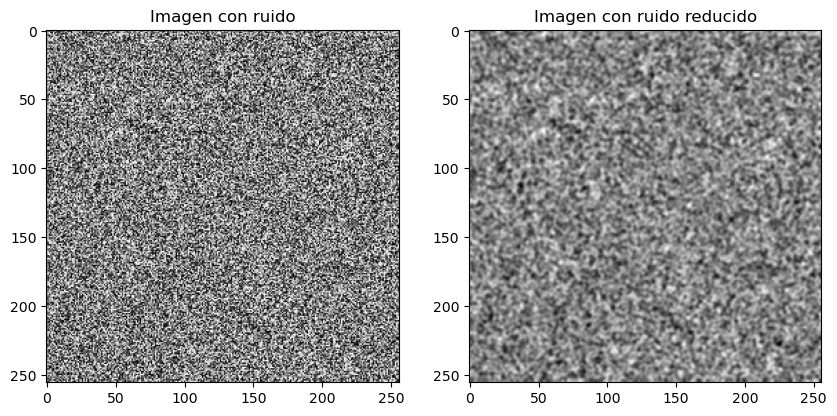

In [ ]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

imgRuido=np.random.randint(0,256,size=(256,256),dtype=np.uint8)
img_blur=cv2.GaussianBlur(imgRuido,(5,5),0)

plt.figure(figsize=(10, 5))
plt.subplot(121)

plt.imshow(imgRuido,cmap='gray')
plt.title('Imagen con ruido')

plt.subplot(122)
plt.imshow(img_blur,cmap='gray')
plt.title('Imagen con ruido reducido')

plt.show()


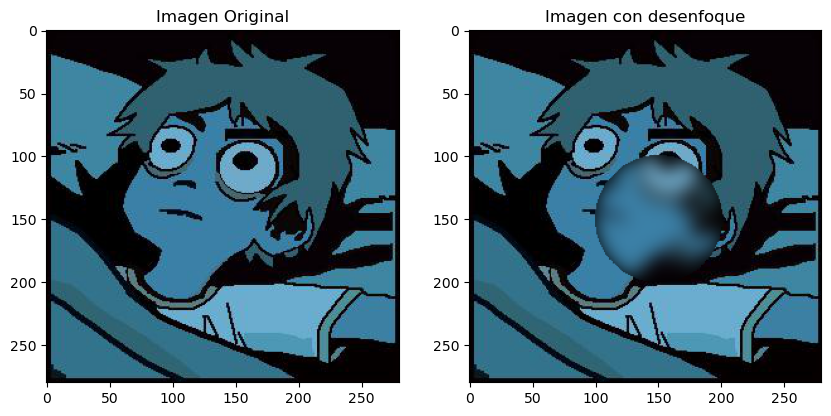

In [7]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

def desenfoqueRoi(img,centro,x,y):
    img1=np.copy(img)  # Copia la imagen original para no modificarla directamente 
    valx,valy=centro
    mediox=x//2
    medioy=y//2
    mascara=np.zeros_like(img,dtype=np.uint8)
    cv2.ellipse(mascara,(valx,valy),(mediox,medioy),0,0,360,(255,255,255),-1)  # Dibuja un elipse en la máscara 
    img_mask=cv2.bitwise_and(img1,mascara)  # Aplica la máscara a la imagen original 
    desenfoque=cv2.GaussianBlur(img_mask,(45,45),0)  # Aplica un desenfoque gaussiano a la región de interés 
    img1[mascara>0]=desenfoque[mascara>0]  # Reemplaza la región de interés en la imagen original con la versión desenfocada 
    return img1
img=cv2.imread('img.jpg')
imagenRgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
imgDesenfoque=desenfoqueRoi(imagenRgb,(150,150),100,100)

plt.figure(figsize=(10, 5))
plt.subplot(121)

plt.imshow(imagenRgb)
plt.title('Imagen Original')

plt.subplot(122)
plt.imshow(imgDesenfoque)
plt.title('Imagen con desenfoque')

plt.show()

    

Bordes y mascaras

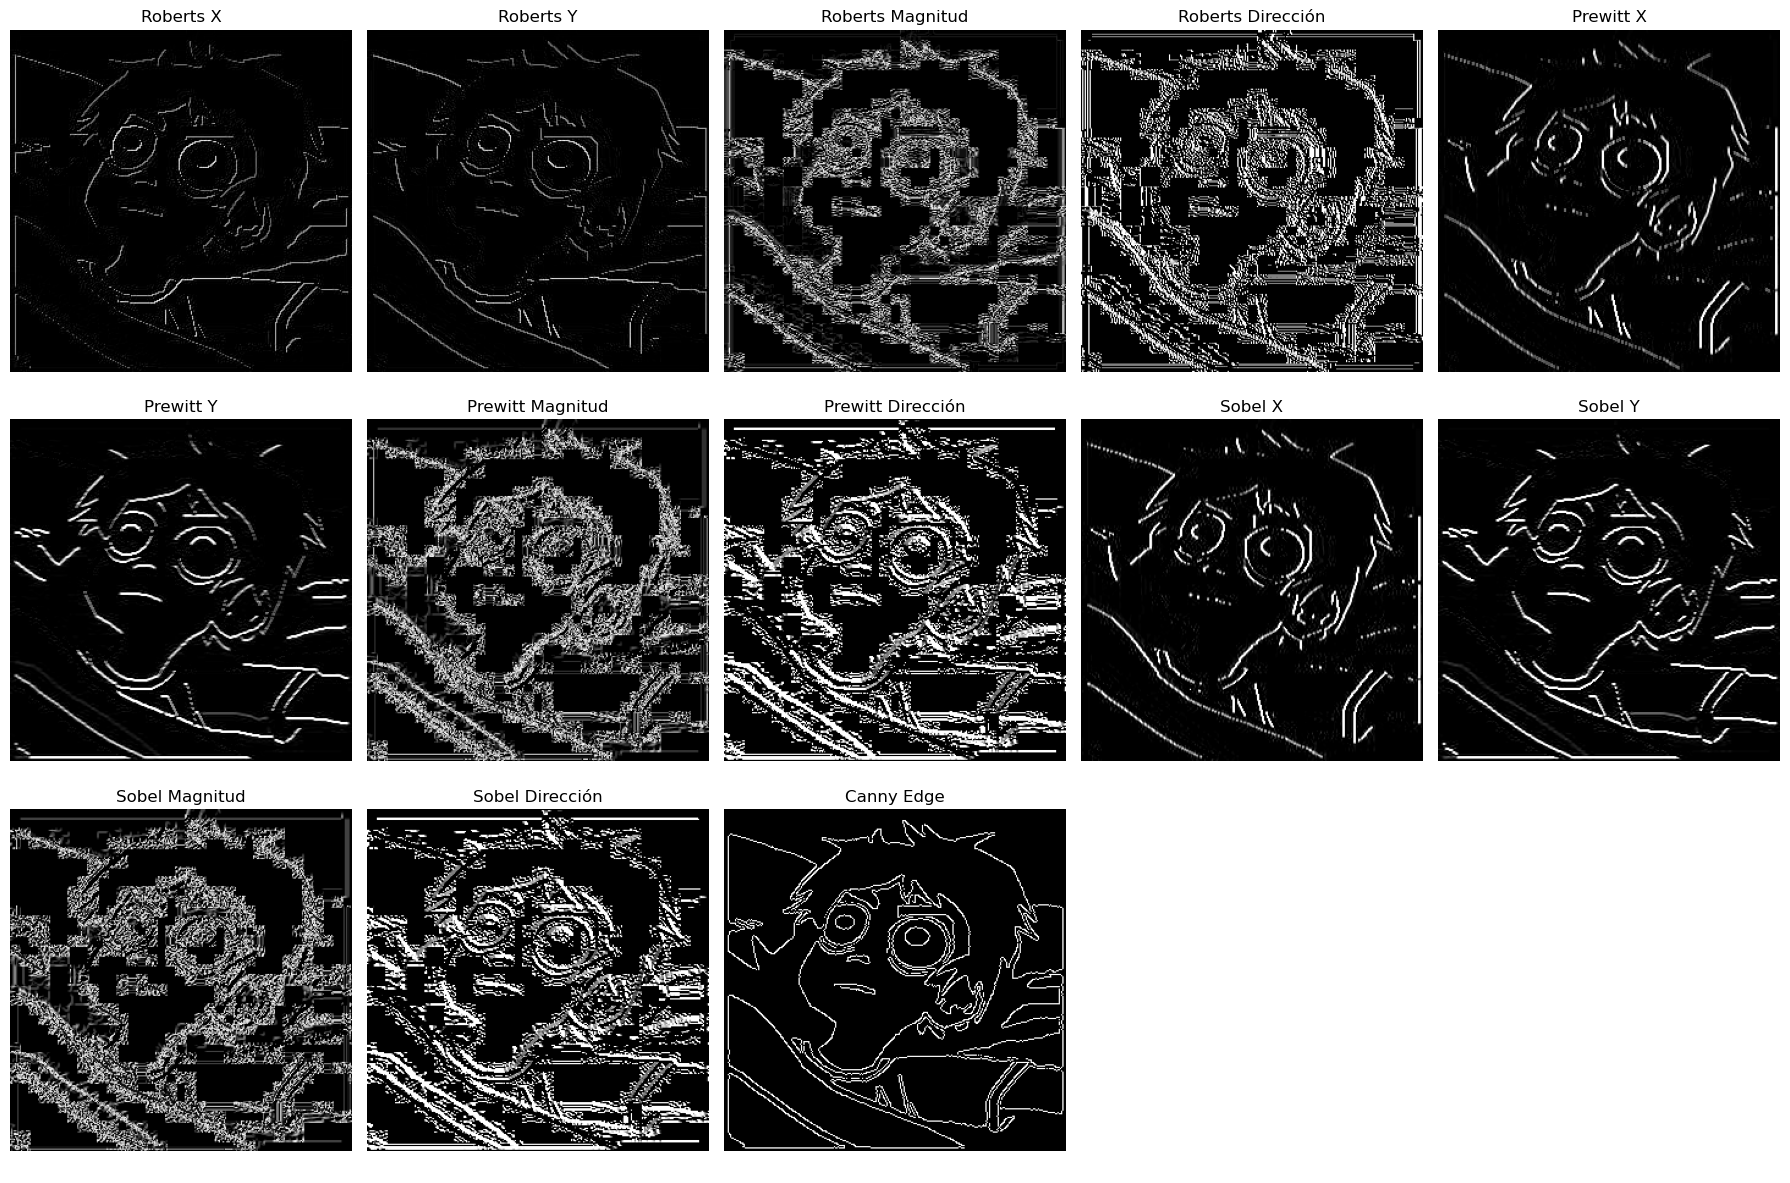

In [ ]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

# Leer la imagen
img = cv2.imread('img.jpg')
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# KERNEL ROBERTS
robertsx = np.array([[-1, 0], [0, 1]])
robertsy = np.array([[0, -1], [1, 0]])

img_robx = cv2.filter2D(imgGray, -1, robertsx)
img_roby = cv2.filter2D(imgGray, -1, robertsy)

rob_gMagnitud = np.sqrt(img_robx**2 + img_roby**2)
rob_gDireccion = np.arctan2(img_roby, img_robx)

# Filtro Prewitt
prewittx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitty = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])  

img_prewitx = cv2.filter2D(imgGray, -1, prewittx)
img_prewity = cv2.filter2D(imgGray, -1, prewitty)

prew_mag = np.sqrt(img_prewitx**2 + img_prewity**2)  
prew_dir = np.arctan2(img_prewity, img_prewitx)  

# Filtro Sobel
sobelx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobely = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

sobx_imge = cv2.filter2D(imgGray, -1, sobelx)
soby_imge = cv2.filter2D(imgGray, -1, sobely)

sobel_grad = np.sqrt(sobx_imge**2 + soby_imge**2) 
sob_dire = np.arctan2(soby_imge, sobx_imge)  

# Canny Edge Detection
canny = cv2.Canny(imgGray, 100, 200)

plt.figure(figsize=(18, 12)) 

# Roberts
plt.subplot(3, 5, 1)
plt.imshow(img_robx, cmap='gray')
plt.title('Roberts X')
plt.axis('off')

plt.subplot(3, 5, 2)
plt.imshow(img_roby, cmap='gray')
plt.title('Roberts Y')
plt.axis('off')

plt.subplot(3, 5, 3)
plt.imshow(rob_gMagnitud, cmap='gray')
plt.title('Roberts Magnitud')
plt.axis('off')

plt.subplot(3, 5, 4)
plt.imshow(rob_gDireccion, cmap='gray')
plt.title('Roberts Dirección')
plt.axis('off')

# Prewitt
plt.subplot(3, 5, 5)
plt.imshow(img_prewitx, cmap='gray')
plt.title('Prewitt X')
plt.axis('off')

plt.subplot(3, 5, 6)
plt.imshow(img_prewity, cmap='gray')
plt.title('Prewitt Y')
plt.axis('off')

plt.subplot(3, 5, 7)
plt.imshow(prew_mag, cmap='gray')
plt.title('Prewitt Magnitud')
plt.axis('off')

plt.subplot(3, 5, 8)
plt.imshow(prew_dir, cmap='gray')
plt.title('Prewitt Dirección')
plt.axis('off')

# Sobel
plt.subplot(3, 5, 9)
plt.imshow(sobx_imge, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(3, 5, 10)
plt.imshow(soby_imge, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.subplot(3, 5, 11)
plt.imshow(sobel_grad, cmap='gray')
plt.title('Sobel Magnitud')
plt.axis('off')

plt.subplot(3, 5, 12)
plt.imshow(sob_dire, cmap='gray')
plt.title('Sobel Dirección')
plt.axis('off')

plt.subplot(3, 5, 13)
plt.imshow(canny, cmap='gray')
plt.title('Canny Edge')
plt.axis('off')

plt.subplot(3, 5, 14)
plt.axis('off')
plt.subplot(3, 5, 15)
plt.axis('off')

plt.tight_layout()
plt.show()

roberts

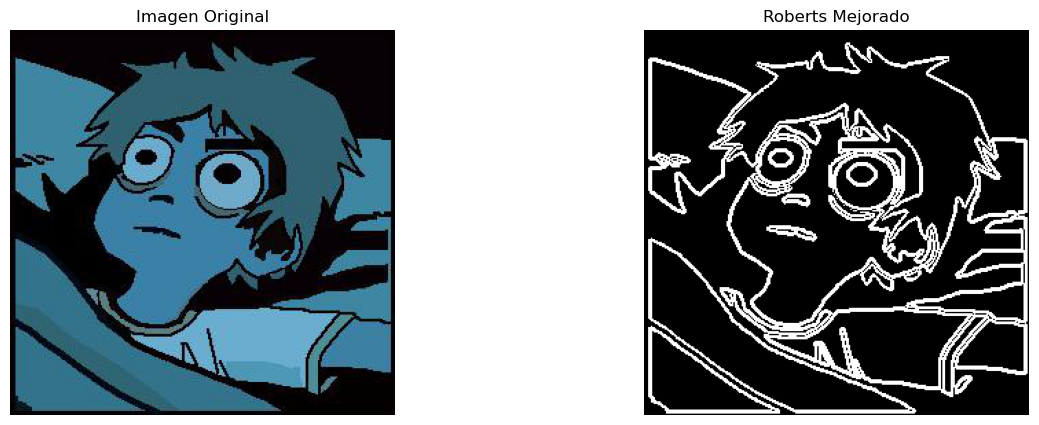

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def robertsMejorado(img):
    imgGRAY = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    suavizado = cv2.GaussianBlur(imgGRAY, (3, 3), 0)
    kernelx = np.array([[-2, 0],
                        [0, 2]], dtype=np.float32)
    kernely = np.array([[0, -2],
                        [2, 0]], dtype=np.float32)
    robx = cv2.filter2D(suavizado, cv2.CV_16S, kernelx)
    roby = cv2.filter2D(suavizado, cv2.CV_16S, kernely)

    roberts = cv2.addWeighted(np.abs(robx), 0.5, np.abs(roby), 0.5, 0)
    _, robFinal = cv2.threshold(roberts, 30, 255, cv2.THRESH_BINARY)
    return robFinal

imagen = cv2.imread('img.jpg')
imagenRGB = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

imagenROBER = robertsMejorado(imagenRGB)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title('Imagen Original')
plt.imshow(imagenRGB)
plt.axis('off')

plt.subplot(122)
plt.title('Roberts Mejorado')
plt.imshow(imagenROBER, cmap='gray')
plt.axis('off')
plt.show()

sobel mejorado 

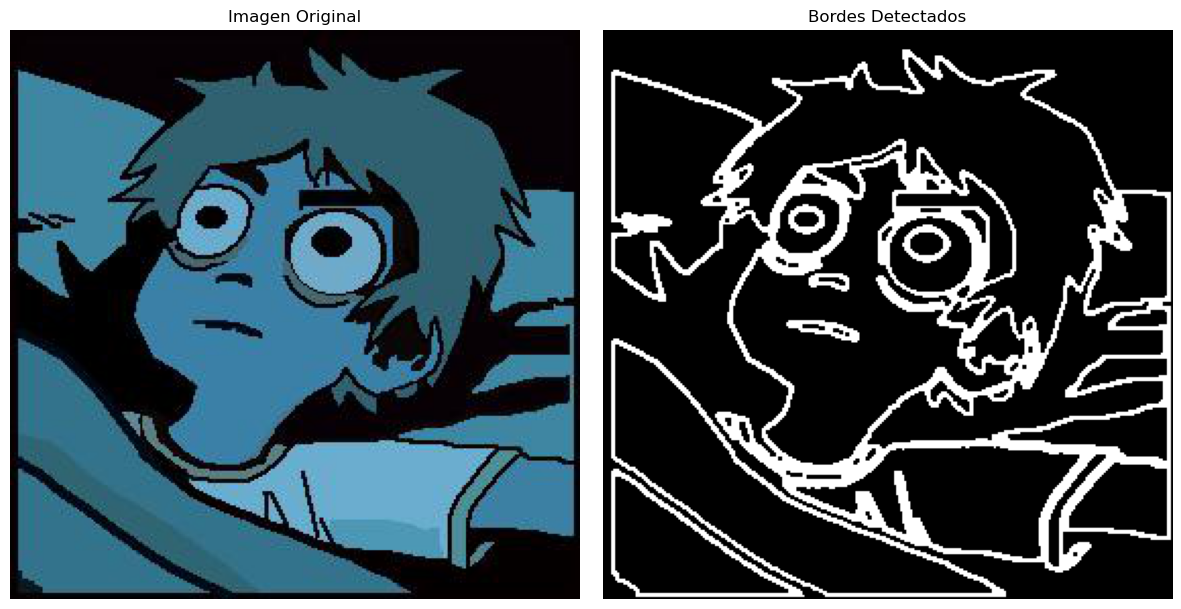

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sobel_mejorado(imagen, tam_kernel=3, umbral=30):
    # Convertir a escala de grises
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    
    # Aplicar desenfoque gaussiano para reducir ruido
    img_blur = cv2.GaussianBlur(img_gray, (3, 3), 0)
    
    # Aplicar Sobel en direcciones x e y
    sobelx = cv2.Sobel(img_blur, cv2.CV_32F, 1, 0, ksize=tam_kernel)
    sobely = cv2.Sobel(img_blur, cv2.CV_32F, 0, 1, ksize=tam_kernel)
    
    # Calcular la magnitud del gradiente
    magnitud = np.sqrt(sobelx**2 + sobely**2)
    
    # Normalizar a rango 0-255
    magnitud = cv2.normalize(magnitud, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    
    # Umbralizar para obtener bordes binarios
    _, bordes = cv2.threshold(magnitud, umbral, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    # Operación morfológica para unir bordes rotos
    kernel_morfologico = np.ones((2, 2), np.uint8)
    bordes = cv2.morphologyEx(bordes, cv2.MORPH_CLOSE, kernel_morfologico)
    
    return bordes

imagen = cv2.imread('img.jpg')  

bordes = sobel_mejorado(imagen)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bordes, cmap='gray')
plt.title('Bordes Detectados')
plt.axis('off')

plt.tight_layout()
plt.show()

PREWITT MEJORADO 

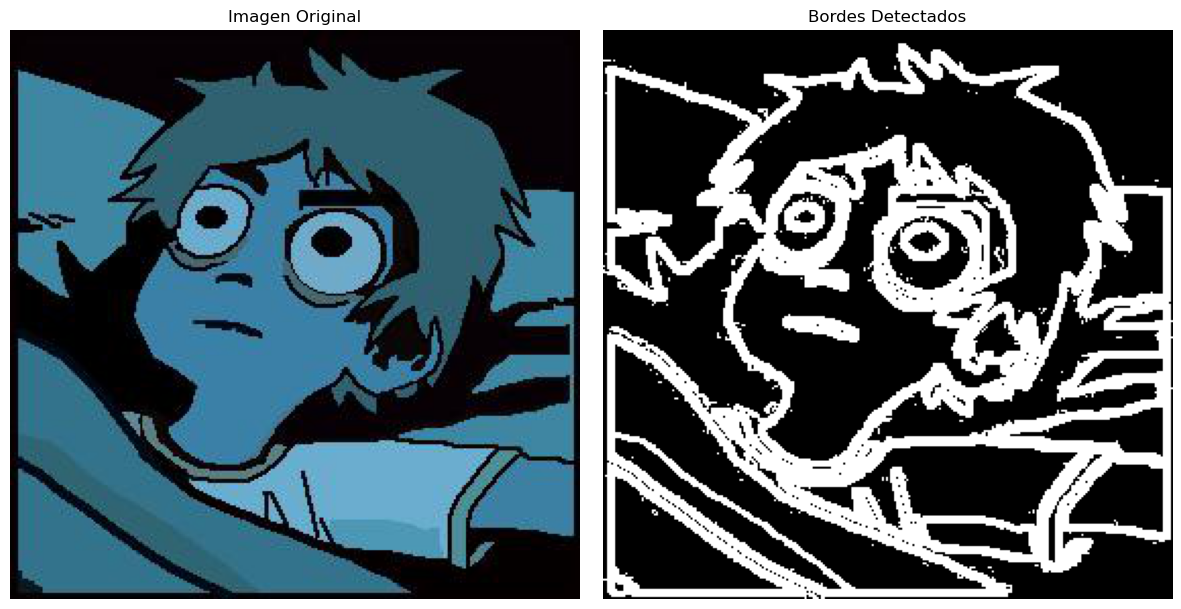

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def prewitt_mejor(imagen):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    img_gray= cv2.GaussianBlur(img_gray, (3, 3), 0)
    
    prewittx=np.array([[3,0,-3],[3,0,-3],[3,0,-3]],dtype=np.float32)
    prewitty=np.array([[3,3,3],[0,0,0],[-3,-3,-3]],dtype=np.float32)
    
    x=cv2.filter2D(img_gray,cv2.CV_64F,prewittx)
    y=cv2.filter2D(img_gray,cv2.CV_64F,prewitty)
    
    magnitud=np.sqrt(x**2+y**2)
    _,bordes=cv2.threshold(magnitud,30,255,cv2.THRESH_BINARY)
    return bordes

imagen = cv2.imread('img.jpg')  

bordes = prewitt_mejor(imagen)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bordes, cmap='gray')
plt.title('Bordes Detectados')
plt.axis('off')

plt.tight_layout()
plt.show()
    

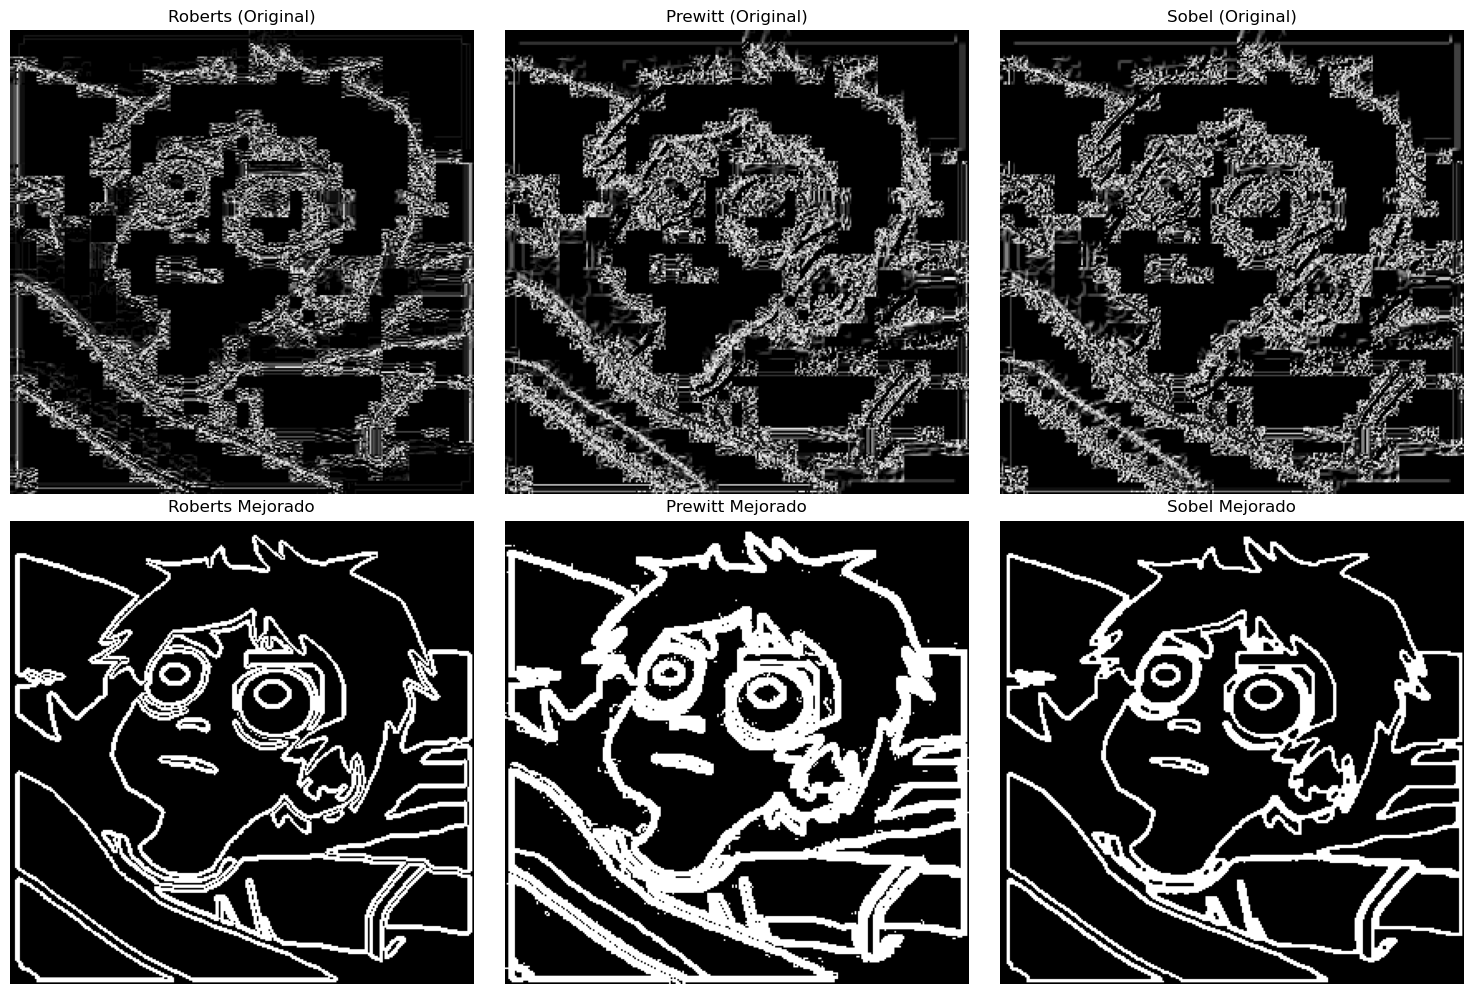

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('img.jpg')
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def mostrarImagenes(imagen):
    imgGray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    
    def robertsNoMej():
        robertsx = np.array([[-1, 0], [0, 1]])
        robertsy = np.array([[0, -1], [1, 0]])
        img_robx = cv2.filter2D(imgGray, -1, robertsx)
        img_roby = cv2.filter2D(imgGray, -1, robertsy)
        rob_gMagnitud = np.sqrt(img_robx**2 + img_roby**2)
        return rob_gMagnitud
    
    def prewitNoMej():
        prewittx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
        prewitty = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])  
        img_prewitx = cv2.filter2D(imgGray, -1, prewittx)
        img_prewity = cv2.filter2D(imgGray, -1, prewitty)
        prew_mag = np.sqrt(img_prewitx**2 + img_prewity**2)  
        return prew_mag
    
    def sobelNoMej():
        sobelx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
        sobely = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
        sobx_imge = cv2.filter2D(imgGray, -1, sobelx)
        soby_imge = cv2.filter2D(imgGray, -1, sobely)
        sobel_grad = np.sqrt(sobx_imge**2 + soby_imge**2) 
        return sobel_grad
    
    def robertsMejorado():
        suavizado = cv2.GaussianBlur(imgGray, (3, 3), 0)
        kernelx = np.array([[-2, 0],
                        [0, 2]], dtype=np.float32)
        kernely = np.array([[0, -2],
                        [2, 0]], dtype=np.float32)
        robx = cv2.filter2D(suavizado, cv2.CV_16S, kernelx)
        roby = cv2.filter2D(suavizado, cv2.CV_16S, kernely)
        roberts = cv2.addWeighted(np.abs(robx), 0.5, np.abs(roby), 0.5, 0)
        _, robFinal = cv2.threshold(roberts, 30, 255, cv2.THRESH_BINARY)
        return robFinal
    
    def prewitt_mejor():
        img_suavizada = cv2.GaussianBlur(imgGray, (3, 3), 0)
        prewittx = np.array([[3, 0, -3], [3, 0, -3], [3, 0, -3]], dtype=np.float32)
        prewitty = np.array([[3, 3, 3], [0, 0, 0], [-3, -3, -3]], dtype=np.float32)
        x = cv2.filter2D(img_suavizada, cv2.CV_64F, prewittx)
        y = cv2.filter2D(img_suavizada, cv2.CV_64F, prewitty)
        magnitud = np.sqrt(x**2 + y**2)
        _, bordes = cv2.threshold(magnitud, 30, 255, cv2.THRESH_BINARY)
        return bordes
    
    def sobel_mejorado():
        img_blur = cv2.GaussianBlur(imgGray, (3, 3), 0)
        sobelx = cv2.Sobel(img_blur, cv2.CV_32F, 1, 0, ksize=3)
        sobely = cv2.Sobel(img_blur, cv2.CV_32F, 0, 1, ksize=3)
        magnitud = np.sqrt(sobelx**2 + sobely**2)
        magnitud = cv2.normalize(magnitud, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
        _, bordes = cv2.threshold(magnitud, 30, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        kernel_morfologico = np.ones((2, 2), np.uint8)
        bordes = cv2.morphologyEx(bordes, cv2.MORPH_CLOSE, kernel_morfologico)
        return bordes
    
    
    rob_no = robertsNoMej()
    prew_no = prewitNoMej()
    sob_no = sobelNoMej()
    rob_mej = robertsMejorado()
    prew_mej = prewitt_mejor()
    sob_mej = sobel_mejorado()
    
  
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 3, 1)
    plt.imshow(rob_no, cmap='gray')
    plt.title('Roberts (Original)')
    plt.axis('off')
    
    plt.subplot(2, 3, 2)
    plt.imshow(prew_no, cmap='gray')
    plt.title('Prewitt (Original)')
    plt.axis('off')
    
    plt.subplot(2, 3, 3)
    plt.imshow(sob_no, cmap='gray')
    plt.title('Sobel (Original)')
    plt.axis('off')
    
    plt.subplot(2, 3, 4)
    plt.imshow(rob_mej, cmap='gray')
    plt.title('Roberts Mejorado')
    plt.axis('off')
    
    plt.subplot(2, 3, 5)
    plt.imshow(prew_mej, cmap='gray')
    plt.title('Prewitt Mejorado')
    plt.axis('off')
    
    plt.subplot(2, 3, 6)
    plt.imshow(sob_mej, cmap='gray')
    plt.title('Sobel Mejorado')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

mostrarImagenes(img)

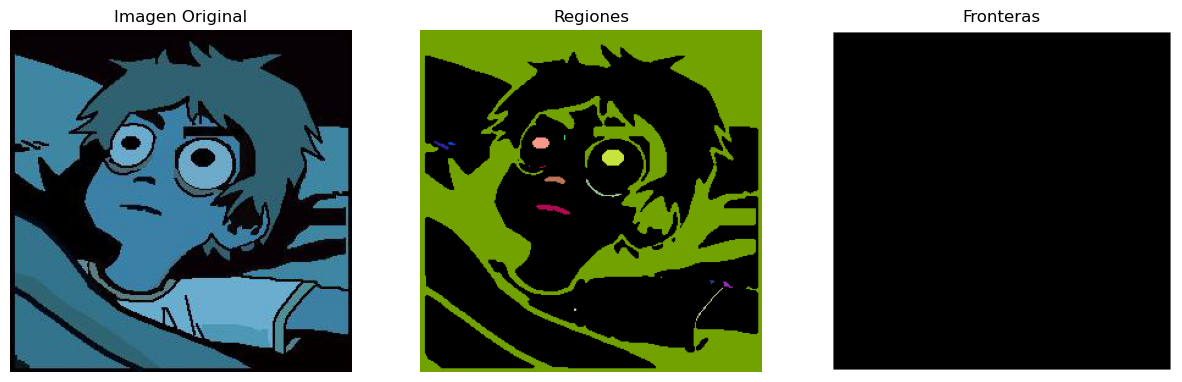

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('img.jpg')
gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7, 7), 0)

_, binarized = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

#Regiones
cant, region = cv2.connectedComponents(binarized)
colores = np.random.randint(0, 255, size=(cant, 3), dtype=np.uint8)
colores[0] = [0, 0, 0]
region_coloreada = colores[region]

#Fronteras
contorno, _ = cv2.findContours(binarized, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
lines = cv2.drawContours(np.zeros_like(gray), contorno, -1, 255, 2)

#Mostrar imagenes
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.title('Imagen Original')
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(132)
plt.title('Regiones')
plt.imshow(region_coloreada)
plt.axis('off')

plt.subplot(133)
plt.title('Fronteras')
plt.imshow(lines, cmap='gray')
plt.axis('off')
plt.show()

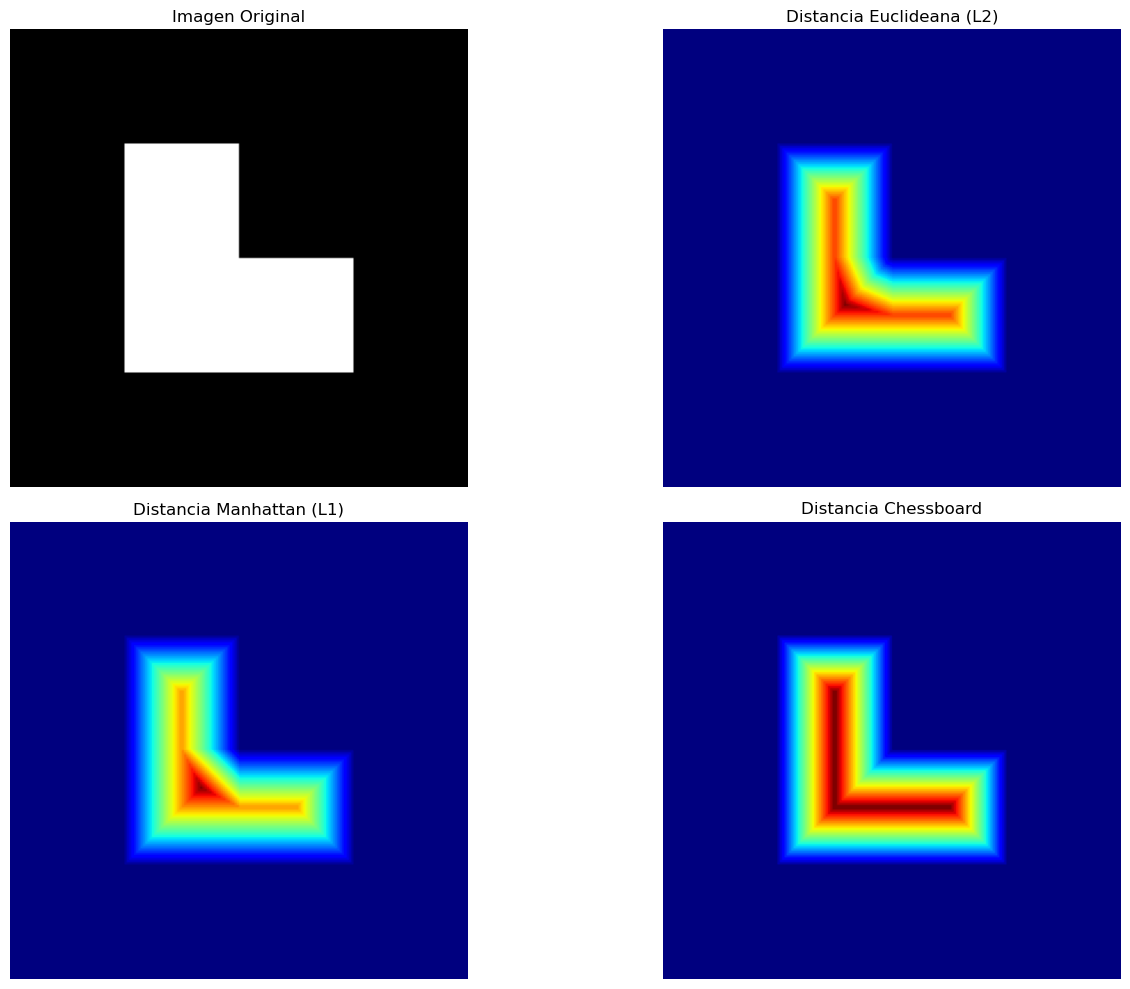

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = np.zeros((200, 200), dtype=np.uint8)
img[50:150, 50:100] = 1
img[100:150, 100:150] = 1

def distancia(img_binarizada):
   
    dist_eucli = cv2.distanceTransform(img_binarizada, cv2.DIST_L2, 3)
    dist_city = cv2.distanceTransform(img_binarizada, cv2.DIST_L1, 3)
    dist_chess = cv2.distanceTransform(img_binarizada, cv2.DIST_C, 3)
    
    return dist_eucli, dist_city, dist_chess  

eucl, city, chess = distancia(img)

def normalizar(dist):
    return cv2.normalize(dist, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

normeucl = normalizar(eucl)
normcity = normalizar(city)
normchess = normalizar(chess)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(normeucl, cmap='jet')
plt.title('Distancia Euclideana (L2)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(normcity, cmap='jet')
plt.title('Distancia Manhattan (L1)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(normchess, cmap='jet')
plt.title('Distancia Chessboard')
plt.axis('off')

plt.tight_layout()
plt.show()

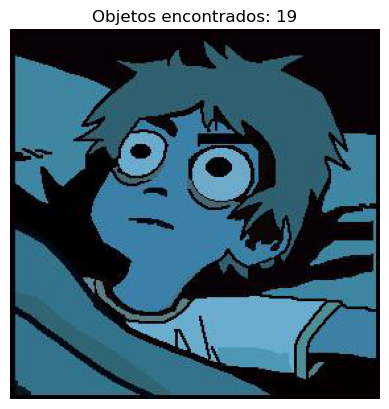

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

def contar(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, img_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
    etiquetar = measure.label(img_bin, connectivity=2) #4=2 8=1
    num = np.max(etiquetar)
    return num

imagen = cv2.imread('img.jpg')
cuenta = contar(imagen)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title(f'Objetos encontrados: {cuenta}')
plt.axis('off')
plt.show()